<a href="https://colab.research.google.com/github/jagritirai223/Telecom-Churn/blob/main/Telecom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


\# <center><u>**`LOGISTIC REGRESSION`**</u></center>



Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).



## **`Problem statement:`**

#### **`Telecom Churn Case Study`**

With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.




### **`Importing and Merging Data`**



In [ ]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline




In [ ]:
# Importing all datasets
churn_data = pd.read_csv("/content/drive/MyDrive/CSV/churn_data.csv")
customer_data = pd.read_csv("/content/drive/MyDrive/CSV/customer_data.csv")
internet_data = pd.read_csv("/content/drive/MyDrive/CSV/internet_data.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Merging churn_data and customer_data on 'customerID' using inner join on customerID
df_1 = pd.merge(churn_data,customer_data,on='customerID', how="inner")
df_1

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,0,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,0,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,0,Yes,Yes
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,1,Yes,No


In [ ]:
#Final dataframe with all predictor variables (merging df_1 and internet_data on 'customerID')
telecom = pd.merge(df_1,internet_data,on='customerID',how='inner')



### Let's understand the structure of our dataframe



In [ ]:
# Let's see the head of our master dataset
telecom.head()




,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [ ]:
#Lets see statistical description for our master data
telecom.describe()



,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [ ]:
# Let's see the type of each column
telecom.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [ ]:
#looking at unique values of some columns
print(telecom['PhoneService'].value_counts())

print(telecom['PaperlessBilling'].value_counts())

print(telecom['Churn'].value_counts())

print(telecom['Partner'].value_counts())

print(telecom['Dependents'].value_counts())

print(telecom['PaymentMethod'].value_counts())





Yes    6361
No      682
Name: PhoneService, dtype: int64
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
No     5174
Yes    1869
Name: Churn, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


## **`Data Preparation`**



In [ ]:
# Converting Yes to 1 and No to 0 using map
telecom['PhoneService'] = telecom['PhoneService'].map({'Yes':1,'No':0})

telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes':1,'No':0})


telecom['Churn'] = telecom['Churn'].map({'Yes':1,'No':0})

telecom['Partner'] = telecom['Partner'].map({'Yes':1,'No':0})

telecom['Dependents'] = telecom['Dependents'].map({'Yes':1,'No':0})


### **`Dummy Variable Creation`**

As you can see there are many textual information in our data set. Lets do encoding for these classes using get_dummies() function.

Note: use prefix='column_name' where column_name is the column whose encoding has to be done.

In [ ]:
# Creating a dummy variable for the variable 'Contract' and keeping drop_first=True
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)

#Adding the results to the master dataframe i.e telecom
telecom = pd.concat([telecom,cont],axis=1)


# Creating a dummy variable for the variable 'PaymentMethod' and keeping drop_first=True
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)



# Creating a dummy variable for the variable 'gender' and keeping drop_first=True
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)

#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)


# Creating a dummy variable for the variable 'MultipleLines' and keeping drop_first=True
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines',drop_first=True)

#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],axis=1)


#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and keeping drop_first=True
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)


#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)


# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity',drop_first=True)



#drop OnlineSecurity_No internet service column from os
os1= os.drop(['OnlineSecurity_No internet service'],axis=1)

#Adding os1 to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)


# Creating a dummy variable for the variable 'OnlineBackup' and keeping drop_first=True
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup',drop_first=True)


#dropping OnlineBackup_No internet service from ob
ob1 = ob.drop(['OnlineBackup_No internet service'],axis=1)

#Adding the results(ob1) to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)


# Creating a dummy variable for the variable 'DeviceProtection' and keeping drop_first=True
dp = pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection',drop_first=True)


#dropping DeviceProtection_No internet service
dp1 = dp.drop(['DeviceProtection_No internet service'],axis=1)

#Adding the results(dp1) to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)


# Creating a dummy variable for the variable 'TechSupport' and keeping drop_first=True
ts = pd.get_dummies(telecom['TechSupport'],prefix='TechSupport',drop_first=True)


#dropping TechSupport_No internet service from ts
ts1 = ts.drop(['TechSupport_No internet service'],axis=1)

#Adding the results(ts1) to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)


# Creating a dummy variable for the variable 'StreamingTV' and keeping drop_first=True
st = pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV',drop_first=True)


#dropping StreamingTV_No internet service from st
st1 = st.drop(['StreamingTV_No internet service'],axis=1)

#Adding the results(st1) to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)


# Creating a dummy variable for the variable 'StreamingMovies' and keeping drop_first=True
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies',drop_first=True)



#dropping StreamingMovies_No internet service from sm
sm1 = sm.drop(['StreamingMovies_No internet service'],axis=1)
#Adding the results(sm1) to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

In [ ]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,gender_Male,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,0,1,0,1,0,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,0,1,0,1,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,1,0,0,0,0,0,0,0


### **`Dropping the repeated variables`**

Since We have already created dummies for the below variables
    
    'Contract',
    'PaymentMethod',
    'gender',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
so we can drop them off as they are now repeated in our master dataset


In [ ]:
# drop all duplicate columns
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1)


In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

The TotalCharges variable was imported as a string we need to convert it to numeric type<br>


In [ ]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'],errors='coerce')

Now we can see we have all variables as integer.

### **`Checking for Outliers`**



Checking for outliers in the continuous variables like 'tenure','MonthlyCharges','SeniorCitizen','TotalCharges'


In [ ]:
# Getting all continues variables in separate dataframe
num_telecom = telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
print(type(num_telecom))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])



,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From the distribution shown above, you can see that there no outliner in your data as the numbers are gradually increasing.

### **`Checking for Missing Values and Inputing Them`**

<p style='text-align: right;'> 5 points</p>


In [ ]:
# Checking total missing values (column-wise)
telecom.isnull().sum()



customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_Yes                        0
OnlineBackup_Yes                          0
DeviceProtection_Yes                      0
TechSupport_Yes                 

It can be seen that total charges column has 11 null values.

In [ ]:
# Checking the percentage of missing values
round(telecom.isnull().sum()/len(telecom.index),2)



customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
MultipleLines_Yes                        0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
OnlineSecurity_Yes                       0.0
OnlineBackup_Yes                         0.0
DeviceProtection_Yes                     0.0
TechSuppor

It means that 11/7043 = 0.001561834 i.e 0.15%, the best option to get rid of these null values in this scenario is to remove these observations from the analysis

In [ ]:
# Removing NaN form TotalCharges rows
telecom=telecom[~np.isnan(telecom['TotalCharges'])]




In [ ]:
# Lets Check missing values after removing the missing values
telecom.isnull().sum()


customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV

Now we don't have any missing values

### **`Feature Standardisation`**



Standardization is one of the scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [ ]:
# Getting all desired variables like 'tenure','MonthlyCharges' and 'TotalCharges' into one dataframe.
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [ ]:
# Standardising above continuous features

std_df=(df-df.mean())/df.std()
std_df.head()


,tenure,MonthlyCharges,TotalCharges
0,-1.280157,-1.161611,-0.994123
1,0.064298,-0.260859,-0.173727
2,-1.239416,-0.363897,-0.959581
3,0.512450,-0.747797,-0.195234
4,-1.239416,0.196164,-0.940391


In [ ]:
# Dropping 'tenure','MonthlyCharges' and 'TotalCharges' from telecom as we want to add the standardised fetaures
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'],1)

<ipython-input-26-dd1d268723d6>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'],1)


In [ ]:
# Add std_df into telecom
telecom = pd.concat([telecom,std_df],axis=1)


In [ ]:
# print telecom tail
telecom.tail()

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,0,1,0,1,1,1,1,-0.343113,0.664821,-0.129171
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,0,0,1,1,0,1,1,1.612459,1.276402,2.240896
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,-0.872746,-1.169921,-0.854453
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,-1.157934,0.319145,-0.872033
7042,3186-AJIEK,1,1,0,0,0,0,0,1,0,...,0,1,0,1,1,1,1,1.368012,1.357835,2.012201


### **`Checking the Churn Rate`**




In [ ]:
#caluclating total churn percentage in our master dataframe
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100

In [ ]:
# print churn
print(churn)



26.578498293515356


We have almost 27% churn rate

## **`Model Building`**



Let's start by splitting our data into a training set and a test set.

In [ ]:
# Putting feature variable to X. drop 'customerID' from features as its not informative for our prediction
X = telecom.drop(['Churn','customerID'],axis=1)


# Putting response variable to y
y = telecom['Churn']


In [ ]:
# print y head
y.head()



0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### **`Running Your First Training Model`**

In [ ]:
# import statsmodels api as sm
import statsmodels.api as sm



Statsmodels provides a Logit() function for performing logistic regression. The Logit() function accepts y and X as parameters and returns the Logit object. The model is then fitted to the data.

Reference:

### **`Splitting Data into Training and Test Sets`**

In [ ]:
# import train_test_split module
from sklearn.model_selection import train_test_split



In [ ]:
# adding constant to X
X=sm.add_constant(X)



In [ ]:
# Splitting the data into train and test with train_size=0.7 and random_state=100
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)



In [ ]:
# Logistic regression model
logm1 = sm.Logit(y_train,X_train)

#fitting the data
logm1.fit().summary()




Optimization terminated successfully.
         Current function value: 0.407291
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4898
Method:                           MLE   Df Model:                           23
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.2912
Time:                        10:01:43   Log-Likelihood:                -2004.7
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9338      1.545     -2.545      0.011      -6.963      -0.905
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
tenure                                   -1.5198      0.190     -8.015      0.000      -1.891      -1.148
MonthlyCharges                           -2.1817      1.160     -1.880      0.060      -4.456       0.092
TotalCharges                              0.7329      0.198      3.705      0.000       0.345       1.121
=========================================================================================================
"""

From above we can see that there few statistically insignificant variables present in our dataset. Lets drop them off.

Reject the null hyposthesis looking into P values.

Few insignificant variables we can see from above stats summary are:
Partner,PaymentMethod_Electronic check,gender_Male,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,MonthlyCharges.
    
So lets drop them off from X

Note: We are not dropping const variable as it is required for OLS model building

In [ ]:
X=X.drop(['Partner','PaymentMethod_Electronic check','gender_Male','OnlineSecurity_Yes','OnlineBackup_Yes','DeviceProtection_Yes','TechSupport_Yes','MonthlyCharges'],axis=1)


### **`Correlation Matrix`**


<AxesSubplot:>

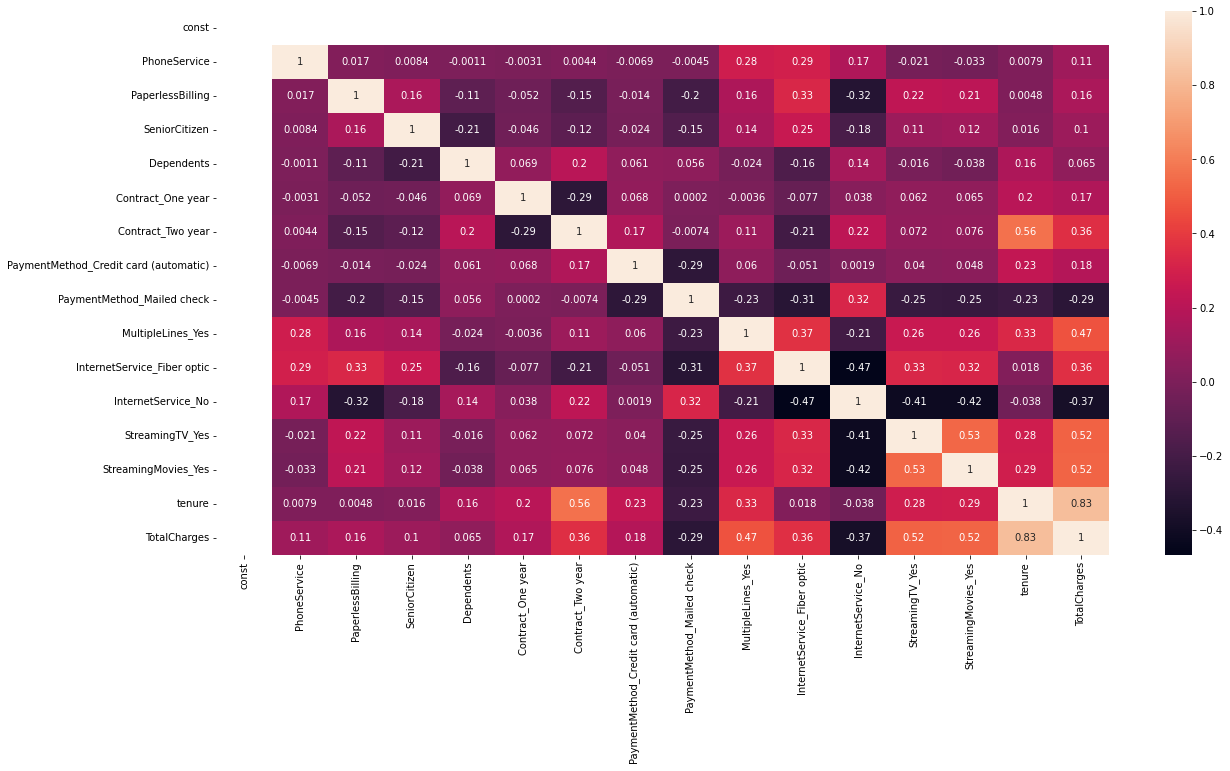

In [ ]:
# Let's see the correlation matrix

plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)



In [ ]:
# Write a correlation function to drop correlleation function to remove highly correlated variables (>70%)
def correlation(dataset, threshold):
    # Set of all the names of correlated columns
    col_corr =set()

    # apply corr method on dataset
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):

            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i,j])>threshold:
                # getting the name of column
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr


In [ ]:
# call the function with threshold
corr_features=correlation(X,0.7)
len(set(corr_features))

1

In [ ]:
# print corr_features
print(corr_features)




{'TotalCharges'}


In [ ]:
# Lets drop the above variables from X
X.drop(['TotalCharges'],axis=1,inplace=True)




## **`Dropping Variable with high VIF`**



Lets check multicollinearity using Variance inflation factor

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# empyty dataframe
vif = pd.DataFrame()

#variables names with all variables in column X
vif['variables']=X.columns


# Vif scores for corresponding features
vif["VIF"]=[round(variance_inflation_factor(X.values,i),2) for i in range(X.shape[1])]



In [ ]:
# print vif
print(vif.sort_values(by='VIF'))

                                variables    VIF
4                              Dependents   1.11
3                           SeniorCitizen   1.13
7   PaymentMethod_Credit card (automatic)   1.16
2                        PaperlessBilling   1.20
1                            PhoneService   1.35
8              PaymentMethod_Mailed check   1.36
9                       MultipleLines_Yes   1.42
5                       Contract_One year   1.58
12                        StreamingTV_Yes   1.59
13                    StreamingMovies_Yes   1.59
11                     InternetService_No   1.84
10            InternetService_Fiber optic   1.90
14                                 tenure   2.43
6                       Contract_Two year   2.49
0                                   const  16.74


Lets drop variables which are having very high vif scores except const., here we notice VIF values are nt that high, so we won't drop.

### **`Checking the Correlation Matrix again`**

<AxesSubplot:>

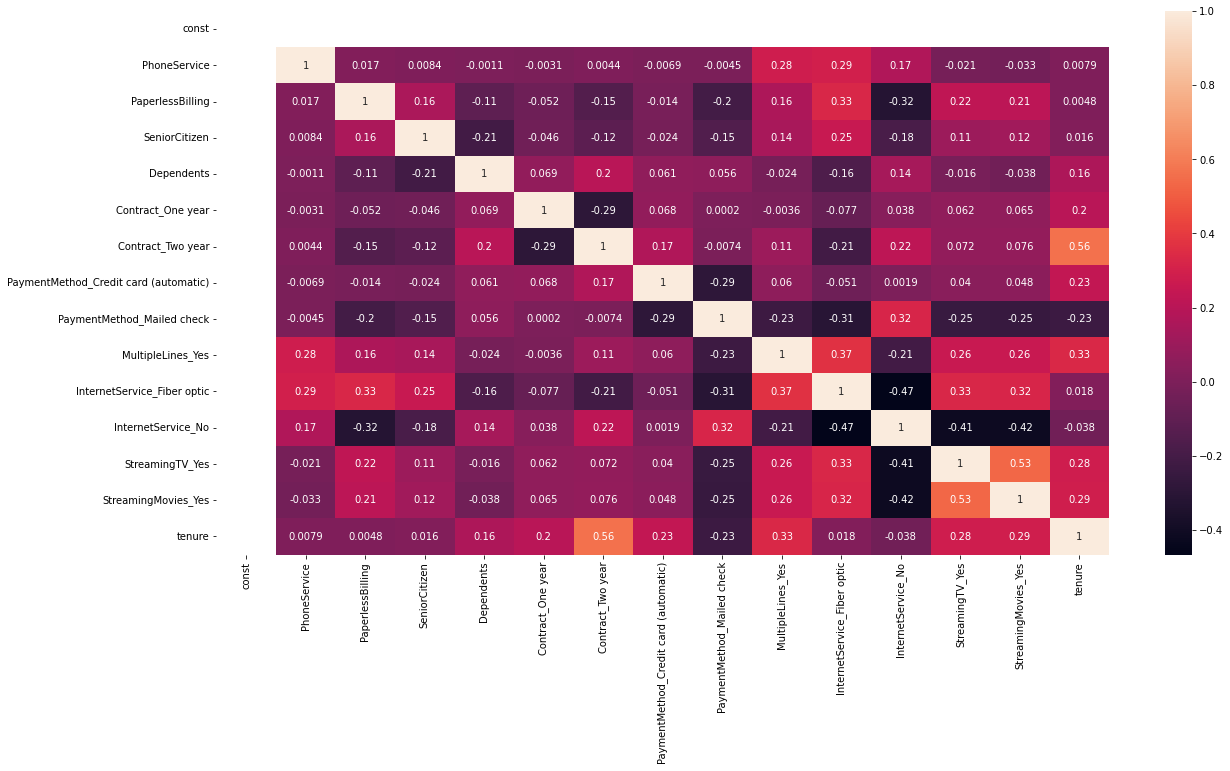

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr(),annot=True)

### **`Re-Running the Model`**




Now let's run our model again after dropping highly correlated variables

In [ ]:
# Splitting the data into train and test with train_size=0.7 and random_state=100 again
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

# call logit method on sm and pass train data
logm2 = sm.Logit(y_train,X_train)

# call fit and summary on logm2
logm2.fit().summary()



Optimization terminated successfully.
         Current function value: 0.412213
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4907
Method:                           MLE   Df Model:                           14
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.2826
Time:                        10:03:12   Log-Likelihood:                -2028.9
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4351      0.161     -8.938      0.000      -1.750      -1.120
PhoneService                             -0.4249      0.152     -2.789      0.005      -0.724      -0.126
PaperlessBilling                          0.3369      0.089      3.785      0.000       0.162       0.511
SeniorCitizen                             0.4487      0.101      4.459      0.000       0.251       0.646
Dependents                               -0.1601      0.098     -1.636      0.102      -0.352       0.032
Contract_One year                        -0.7462      0.126     -5.922      0.000      -0.993      -0.499
Contract_Two year                        -1.3905      0.206     -6.744      0.000      -1.795      -0.986
PaymentMethod_Credit card (automatic)    -0.3967      0.112     -3.533      0.000      -0.617      -0.177
PaymentMethod_Mailed check               -0.3511      0.109     -3.212      0.001      -0.565      -0.137
MultipleLines_Yes                         0.2627      0.094      2.789      0.005       0.078       0.447
InternetService_Fiber optic               0.9740      0.107      9.096      0.000       0.764       1.184
InternetService_No                       -0.7232      0.159     -4.550      0.000      -1.035      -0.412
StreamingTV_Yes                           0.3088      0.093      3.308      0.001       0.126       0.492
StreamingMovies_Yes                       0.2011      0.093      2.158      0.031       0.018       0.384
tenure                                   -0.9737      0.065    -14.891      0.000      -1.102      -0.846
=========================================================================================================
"""

Feature Selection using RFE

In [ ]:
#import RFE and LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#initialise LogisticRegression()
logreg=LogisticRegression()

#Initiate RFE

rfe=RFE(logreg)

#fitting RFE
rfe=rfe.fit(X,y)

#Printing the boolean results
print(rfe.support_)

#Printing the ranking
print(rfe.ranking_)


[False  True  True False False  True  True False False False  True  True
 False False  True]
[9 1 1 4 8 1 1 5 6 3 1 1 7 2 1]


In [ ]:
#printing the column names which were supported by RFE
X.columns[(rfe.support_)]

Index(['PhoneService', 'PaperlessBilling', 'Contract_One year',
       'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'tenure'],
      dtype='object')

In [ ]:
#variables selected by RFE
col=['PhoneService', 'Contract_One year',
       'Contract_Two year', 'InternetService_Fiber optic',
       'InternetService_No', 'tenure']

In [ ]:
# Let's run the model using the selected variables but this time we will use Logistic Regression

#initialise Logistic Regression
logsk = LogisticRegression()

#fitting model using above columns as input
logsk.fit(X_train[col],y_train)



LogisticRegression()

In [ ]:
#recreating the model with StatsModels with RFE selecte columns

logm3 =  sm.Logit(y_train,X_train[col])
logm3.fit().summary()

Optimization terminated successfully.
         Current function value: 0.430875
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                          Logit   Df Residuals:                     4916
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.2501
Time:                        10:56:41   Log-Likelihood:                -2120.8
converged:                       True   LL-Null:                       -2828.2
Covariance Type:            nonrobust   LLR p-value:                8.491e-304
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
PhoneService                   -1.3219      0.095    -13.945      0.000      -1.508      -1.136
Contract_One year              -1.1613      0.115    -10.074      0.000      -1.387      -0.935
Contract_Two year              -2.0266      0.193    -10.481      0.000      -2.406      -1.648
InternetService_Fiber optic     1.2775      0.099     12.878      0.000       1.083       1.472
InternetService_No             -1.0118      0.153     -6.621      0.000      -1.311      -0.712
tenure                         -0.6421      0.053    -12.157      0.000      -0.746      -0.539
===============================================================================================
"""

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4922, 15)
(2110, 15)
(4922,)
(2110,)


### **`Making Predictions`**

<p style='text-align: right;'> 14 points</p>


In [ ]:
# Predicted probabilities
y_pred=logsk.predict_proba(X_test[col])


We are not getting direct Predictions, bt prediction in terms of probabilities

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [ ]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [ ]:
# Let's see the head
y_pred_1.head()


,1
0,0.532332
1,0.279911
2,0.007329
3,0.706479
4,0.012679


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [ ]:
y_test_df.head()

,Churn,CustID
942,0,942
3730,1,3730
1761,0,1761
2283,1,2283
1872,0,1872


In [ ]:
# Putting CustID to index
y_test_df['CustID']=y_test_df.index


In [ ]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

We removed index so that we can append them side by side

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)


In [ ]:
y_pred_final.head()

,Churn,CustID,1
0,0,942,0.532332
1,1,3730,0.279911
2,0,1761,0.007329
3,1,2283,0.706479
4,0,1872,0.012679


In [ ]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={1:'Churn_Prob'})


In [ ]:
#print y_pred_final
y_pred_final

,Churn,CustID,Churn_Prob
0,0,942,0.532332
1,1,3730,0.279911
2,0,1761,0.007329
3,1,2283,0.706479
4,0,1872,0.012679
...,...,...,...
2105,0,1289,0.034885
2106,0,3508,0.051773
2107,0,6765,0.005134
2108,0,3598,0.386097


In [ ]:
#Rearranging the columns
y_pred_final=y_pred_final.reindex(columns=['CustID','Churn','Churn_Prob'])

In [ ]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.532332
1,3730,1,0.279911
2,1761,0,0.007329
3,2283,1,0.706479
4,1872,0,0.012679


In [ ]:
y_pred_final.loc[1,'Churn_Prob']

0.2799108070777218

In [ ]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
for i in range(y_pred_final.shape[0]):
  if y_pred_final.loc[i,'Churn_Prob']>0.5:
    y_pred_final.loc[i,'predicted']=1
  else:
    y_pred_final.loc[i,'predicted']=0


In [ ]:
# Let's see the head
y_pred_final.head()


,CustID,Churn,Churn_Prob,predicted
0,942,0,0.532332,1
1,3730,1,0.279911,0
2,1761,0,0.007329,0
3,2283,1,0.706479,1
4,1872,0,0.012679,0


### **`Model Evaluation`**




Choosing the right metric is very important in any classification problem.
To know about various metrics for classification model evaluation refer:




Lets check Confusion matrix for model evaluation:
for categorical classical problem we used to check COnfusion matrix
Confusion metrics-For checking Measure of Performance for our model

In [ ]:
# import metrics
from sklearn import metrics


In [ ]:
# Lets check what all things python provides us in confusion matrix using help function.
help(metrics.confusion_matrix)


Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [ ]:
# get Confusion matrix
confusion = metrics.confusion_matrix(y_pred_final.Churn,y_pred_final.predicted)
confusion

array([[1366,  162],
       [ 304,  278]])

if it's not churn and our model also predicted it's not churn the value is 1366.

if it's not churn and our model predicted it's churn the value os 165

In [ ]:
#meaning of above confusion matrix is

# Predicted   not_churn  churn
#Actual
# not_churn    1366(TN)       163(FP)
#churn         304 (FN)       278(TP)

In [ ]:
#Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Churn,y_pred_final.predicted)

0.7791469194312797

In [ ]:
# Lets check true positive ,true negatives,false positives and false negatives

TP = confusion[1,1]              # true positive
TN = confusion[0,0]               # true negatives
FP = confusion[0,1]             # false positives
FN = confusion[1,0]             # false negatives

In [ ]:
# Let's see the sensitivity(How much our model predicted True Positive) of our logistic regression model
sensitivity=TP/float(TP+FN)
sensitivity

0.47766323024054985

In [ ]:
# Let us calculate specificity
specificity=TN/float(TN+FP)
specificity

0.893979057591623

In [ ]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/float(TN+FP))


0.10602094240837696


### **`ROC Curve`**

<p style='text-align: right;'> 1 points</p>


An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [ ]:
# Here we have given you a function to plot ROC curve

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

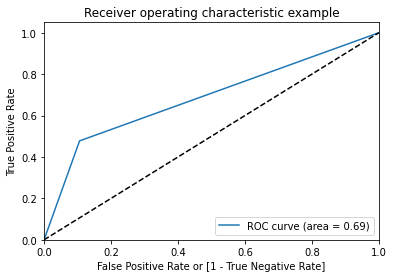

(array([0.        , 0.10602094, 1.        ]),
 array([0.        , 0.47766323, 1.        ]),
 array([2, 1, 0]))

In [ ]:
# Use above function to plot ROC curve
draw_roc(y_pred_final.Churn, y_pred_final.predicted)


## **`Summary`**

1. Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable.
2. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.)





















_______________________________